In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os

In [2]:
if os.path.isdir("mitdb"):
    print('You already have the data.')
else:
    wfdb.dl_database('mitdb', 'mitdb')

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [10]:
record = wfdb.rdsamp('mitdb/100', sampto=3000)
# annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

Text(0, 0.5, 'Lead II')

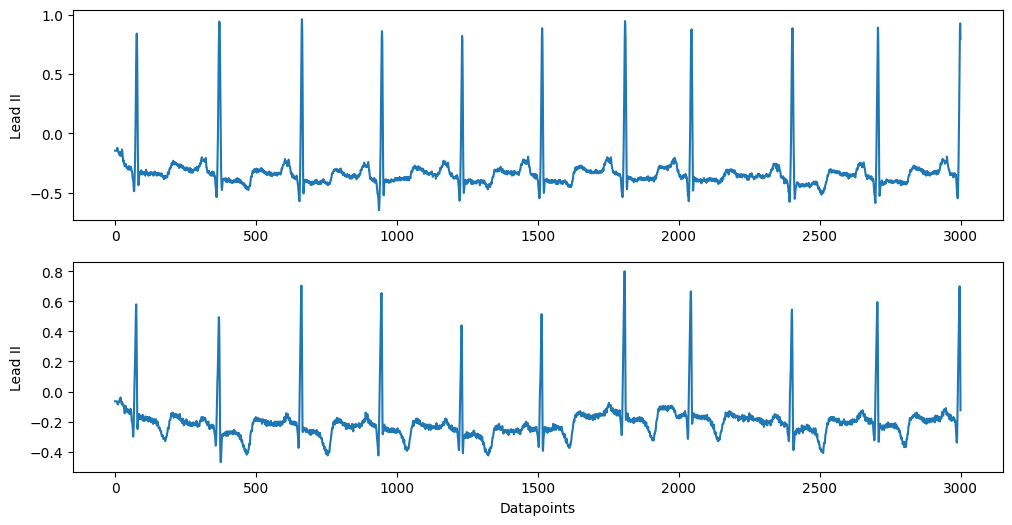

In [11]:
fig, ax = plt.subplots(nrows=2, figsize=(12,6))
I = record[0][:, 0]
II = record[0][:, 1]

ax[0].plot(I)
ax[1].plot(II)
ax[0].set_ylabel('Lead II')
ax[1].set_xlabel('Datapoints')
ax[1].set_ylabel('Lead II')